<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>



# **실습: 이변량 분석 ③ - 범주형  → 범주형**

## **1. 환경준비**

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [3]:
# Attrition 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_simple2.csv'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


**📋 데이터 정보**

- Attrition: 이직 여부 (1: 이직, 0: 잔류)
- Age: 나이
- DistanceFromHome: 집-직장 거리 (단위: 마일)
- EmployeeNumber: 사번
- Gender: 성별 (Male, Female)
- JobSatisfaction: 직무만족도(1: Low, 2: Medium, 3: High, 4: Very High)
- MaritalStatus: 결혼 상태 (Single, Married, Divorced)
- MonthlyIncome: 월급 (단위: 달러)
- OverTime: 야근 여부 (Yes, No)
- PercentSalaryHike: 전년 대비 급여 인상율(단위: %)
- TotalWorkingYears: 총 경력 연수

## **2. 교차표**

- 다음에 지정한 두 변수의 관계에 대해서 교차표를 만들어 보세요.

**1️⃣ 성별(Gender) → 이직 여부(Attrition)**

- 전체 개수

In [4]:
pd.crosstab(data['Gender'], data['Attrition'])

Attrition,0,1
Gender,,
Female,403,66
Male,598,129


- 행 기준 비율

In [27]:
pd.crosstab(data['Gender'], data['Attrition'], normalize='index')

Attrition,0,1
Gender,,
Female,0.859275,0.140725
Male,0.822558,0.177442


- **질문:** 교차표를 통해 성별(Gender)에 따라 이직 여부가 관련 있다고 보이나요?

# 현재 자료로는 판단이 힘듬

**2️⃣ 직무만족도(JobSatisfaction) → 이직 여부(Attrition)**

- 전체 개수

In [7]:
pd.crosstab(data['JobSatisfaction'], data['Attrition'])

Attrition,0,1
JobSatisfaction,,
1,191,52
2,189,37
3,295,59
4,326,47


- 행 기준 비율

In [28]:
pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize='index')

Attrition,0,1
JobSatisfaction,,
1,0.786008,0.213992
2,0.836283,0.163717
3,0.833333,0.166667
4,0.873995,0.126005


- **질문:** 교차표를 통해 직무만족도(JobSatisfaction)에 따라 이직 여부(Attrition)가 관련 있다고 보이나요?

In [31]:
# 직무만족도와 이직 여부는 관련이 있어 보입니다.

**3️⃣ 결혼 상태(MaritalStatus) → 이직 여부(Attrition')**

- 전체 개수

In [10]:
pd.crosstab(data['MaritalStatus'], data['Attrition'])

Attrition,0,1
MaritalStatus,,
Divorced,241,23
Married,479,69
Single,281,103


- 행 기준 비율

In [29]:
pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize='index')

Attrition,0,1
MaritalStatus,,
Divorced,0.912879,0.087121
Married,0.874088,0.125912
Single,0.731771,0.268229


- **질문:** 교차표를 통해 결혼 상태(MaritalStatus)에 따라 이직 여부(Attrition)가 관련 있다고 보이나요?

In [ ]:
# 혼자사는 경우 이직률이 높다

**4️⃣ 야근 여부(OverTime) → 이직 여부(Attrition')**

- 전체 개수

In [12]:
pd.crosstab(data['OverTime'], data['Attrition'])

Attrition,0,1
OverTime,,
No,764,90
Yes,237,105


- 행 기준 비율

In [30]:
pd.crosstab(data['OverTime'], data['Attrition'], normalize='index')

Attrition,0,1
OverTime,,
No,0.894614,0.105386
Yes,0.692982,0.307018


- **질문:** 교차표를 통해 야근 여부(OverTime)에 따라 이직 여부(Attrition)가 관련 있다고 보이나요?

In [ ]:
# 관련이 있어보임

- **질문:** 성별, 직무만족도, 결혼 상태, 야근 여부 중 어떤 변수가 이직 여부를 예측하는데 더 중요한 변수인가요?

In [ ]:
# 야근 여부가 가장 큰 차이를 보임

## **3. 시각화**

- 100% Stacked Bar, Mosaic Plot을 사용해 시각화해 보세요.

**1️⃣ 성별(Gender) → 이직 여부(Attrition)**

- 100% Stacked Bar

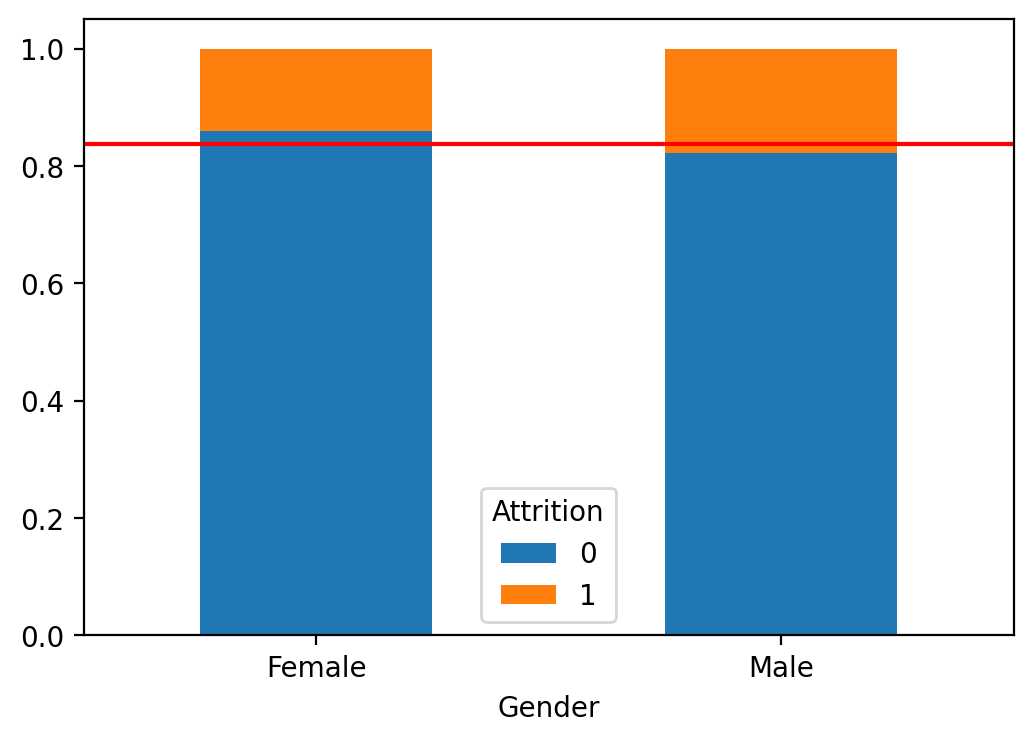

In [13]:
table = pd.crosstab(data['Gender'], data['Attrition'], normalize='index')

table.plot(kind='bar', stacked=True)

plt.axhline(1-data['Attrition'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

- Mosaic Plot

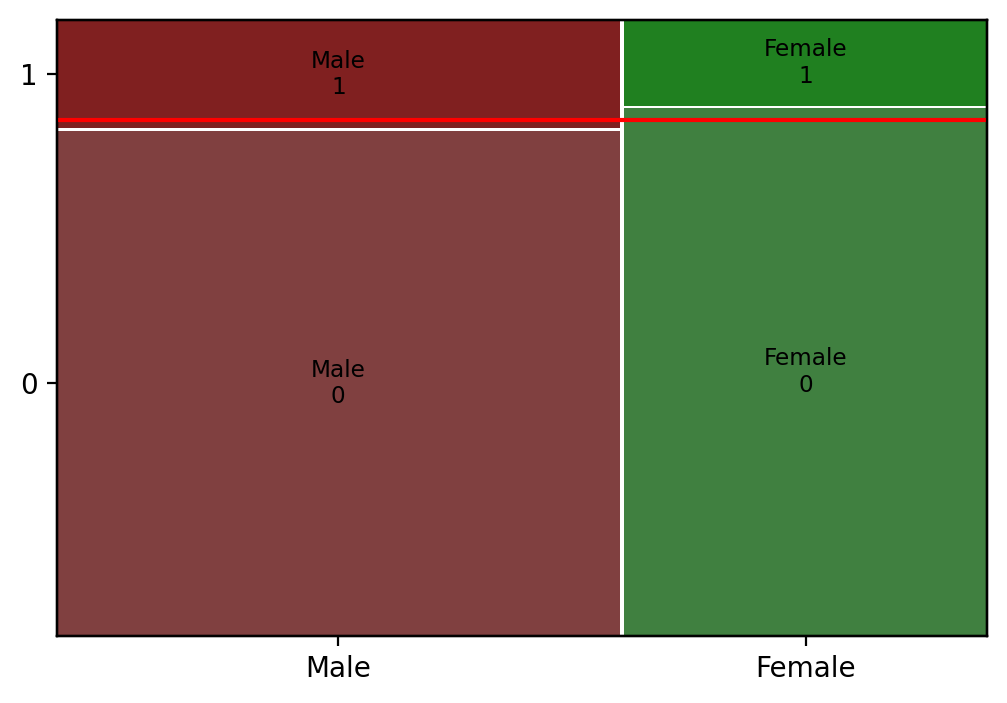

In [14]:
mosaic(data, ['Gender', 'Attrition'])
plt.axhline(1-data['Attrition'].mean(), color='r')
plt.show()

- **질문:**  두 차트로 볼 때, 성별(Gender)에 따라 이직 여부가 달라지나요?

In [ ]:
# 큰 차이가 없다

**2️⃣ 직무만족도(JobSatisfaction) → 이직 여부(Attrition)**

- 100% Stacked Bar

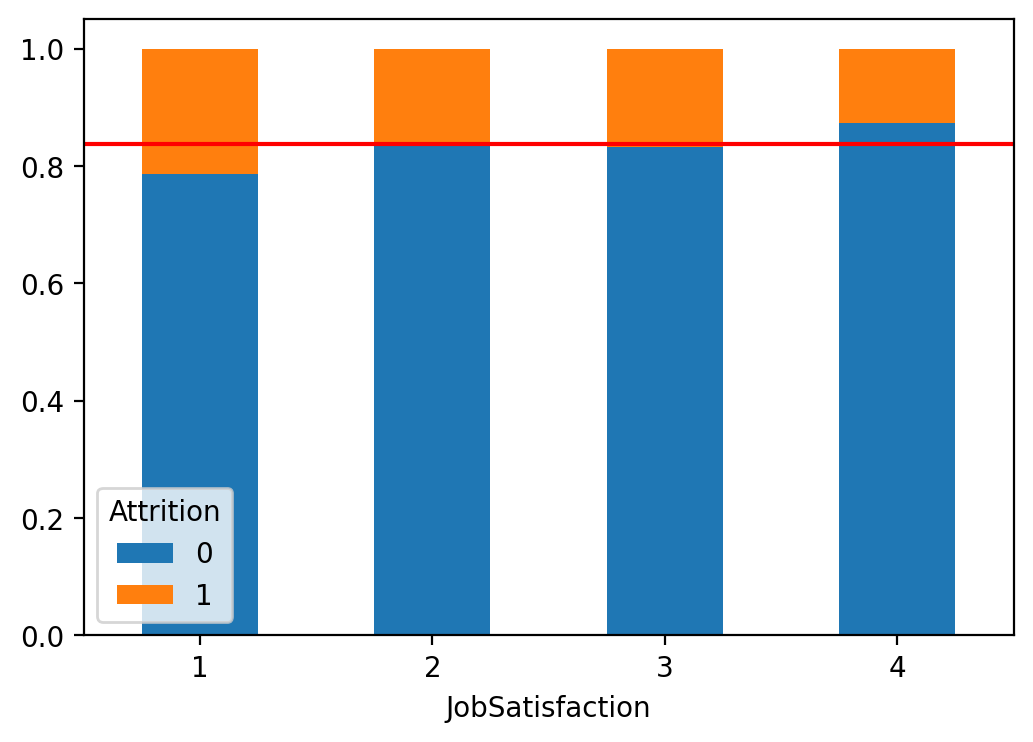

In [15]:
table = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize='index')

table.plot(kind='bar', stacked=True)

plt.axhline(1-data['Attrition'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

- Mosaic Plot

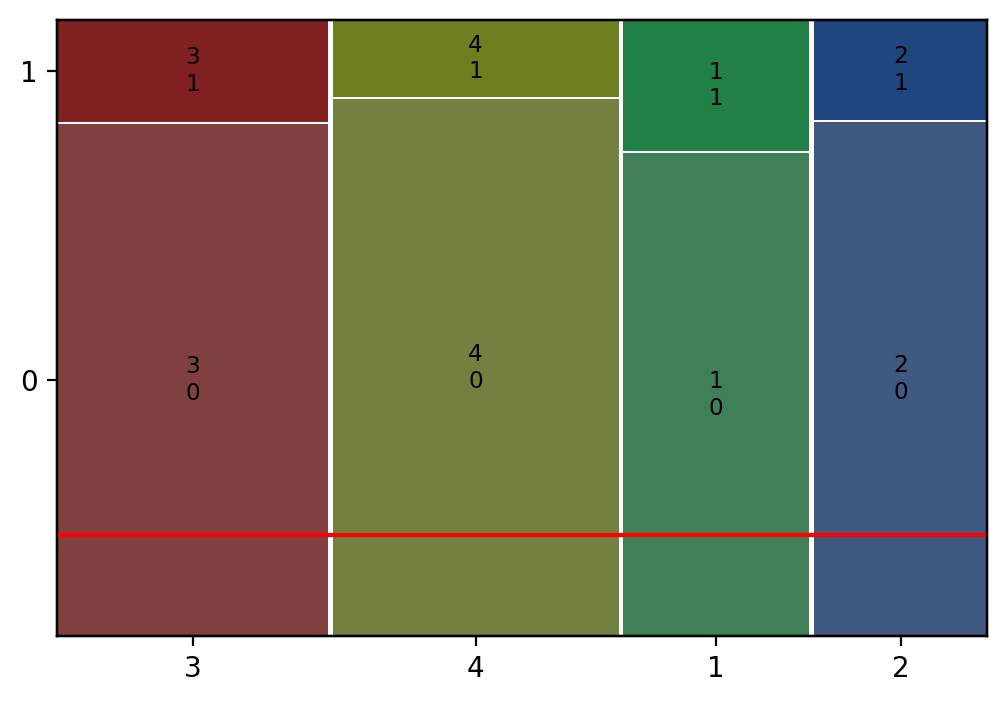

In [34]:
mosaic(data, ['JobSatisfaction', 'Attrition'])
plt.axhline(data['Attrition'].mean(), color='r')
plt.show()

- **질문:** 두 차트로 볼 때, 직무만족도(JobSatisfaction)에 따라 이직 여부(Attrition)가 달라지나요?

In [ ]:
# 큰 차이가 보이지 않음

**3️⃣ 결혼 상태(MaritalStatus) → 이직 여부(Attrition)**

- 100% Stacked Bar

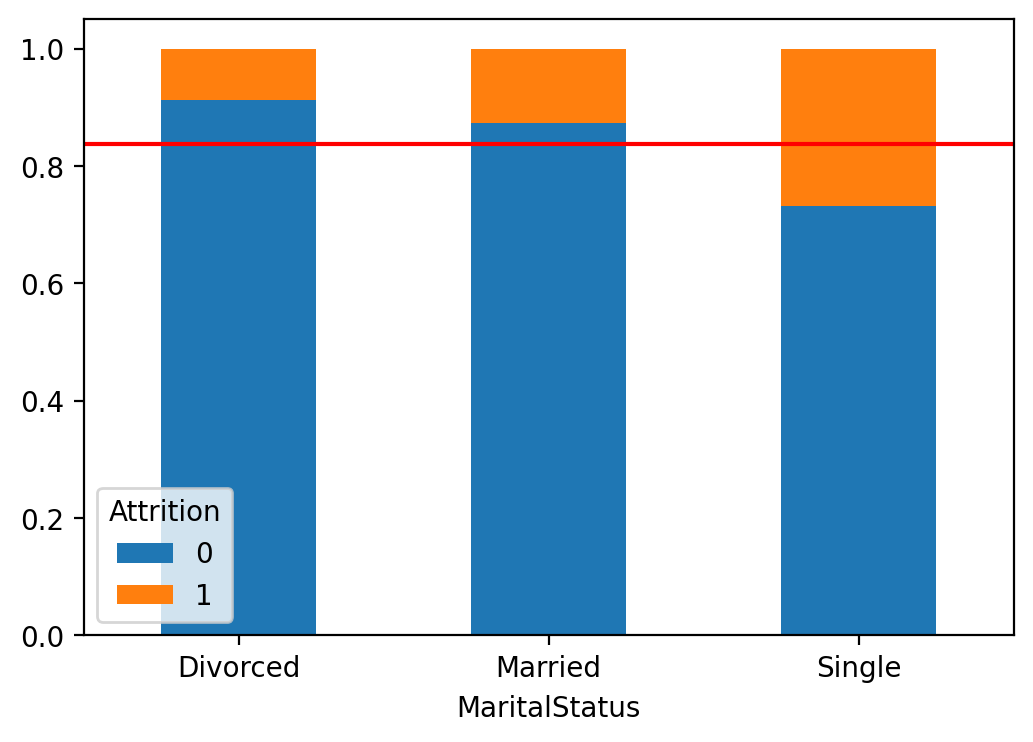

In [17]:
table = pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize='index')

table.plot(kind='bar', stacked=True)

plt.axhline(1-data['Attrition'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

- Mosaic Plot

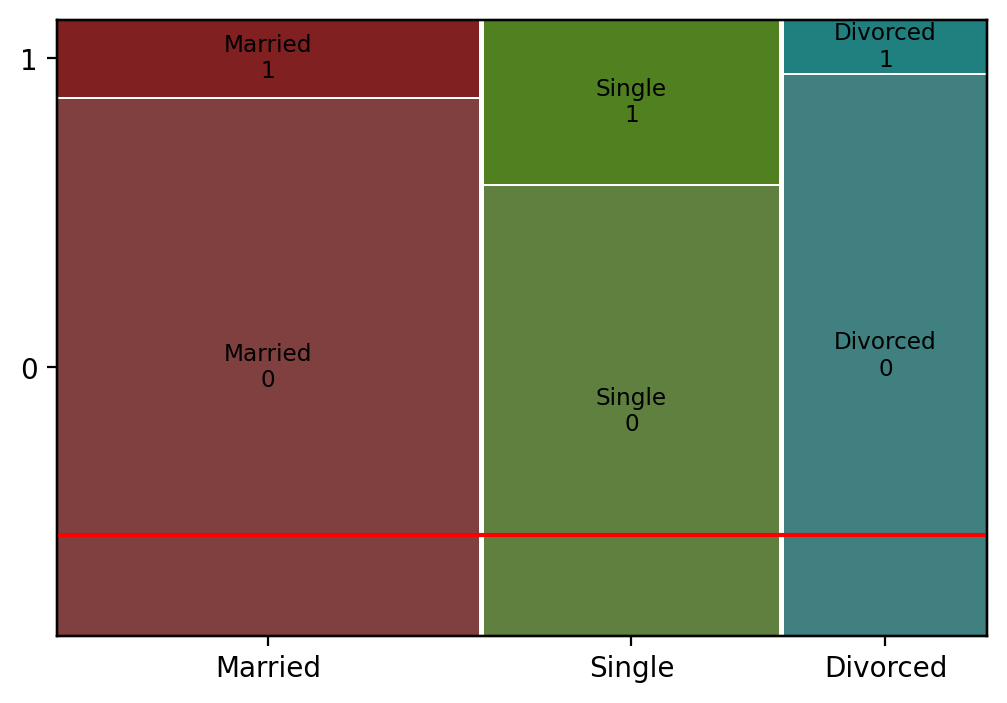

In [32]:
mosaic(data, ['MaritalStatus', 'Attrition'])
plt.axhline(data['Attrition'].mean(), color='r')
plt.show()

- **질문:** 두 차트로 볼 때, 결혼 상태(MaritalStatus)에 따라 이직 여부(Attrition)가 달라지나요?

In [ ]:
# 이혼한 경우와 혼자사는 경우의 

**4️⃣ 야근 여부(OverTime) → 이직 여부(Attrition)**

- 100% Stacked Bar

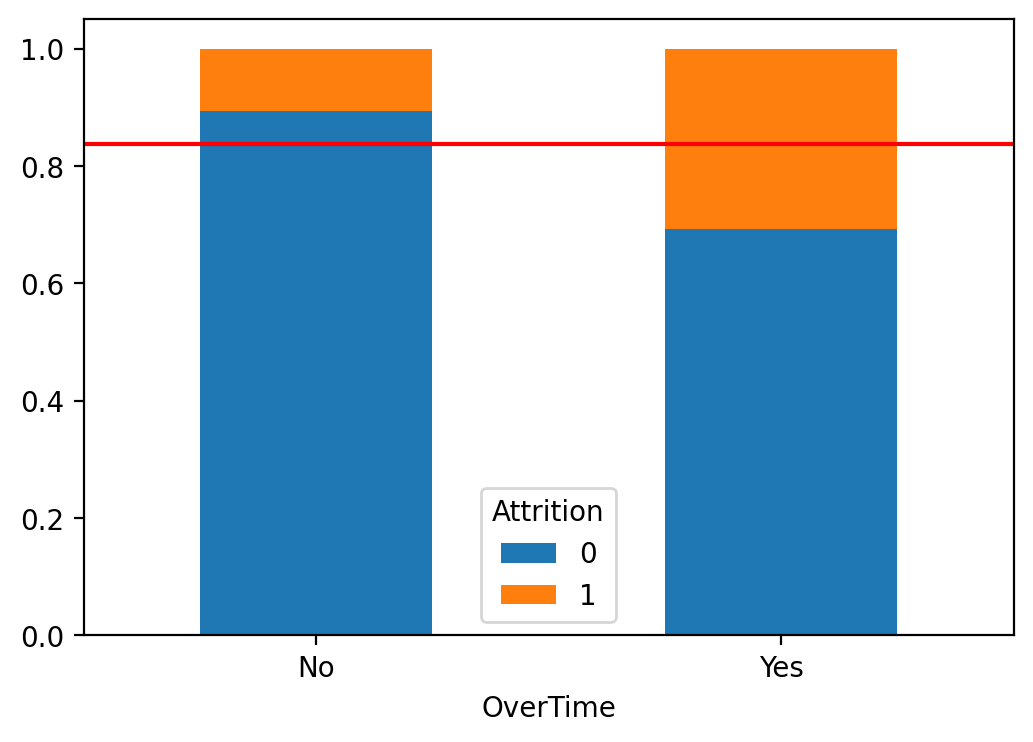

In [19]:
table = pd.crosstab(data['OverTime'], data['Attrition'], normalize='index')

table.plot(kind='bar', stacked=True)

plt.axhline(1-data['Attrition'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

- Mosaic Plot

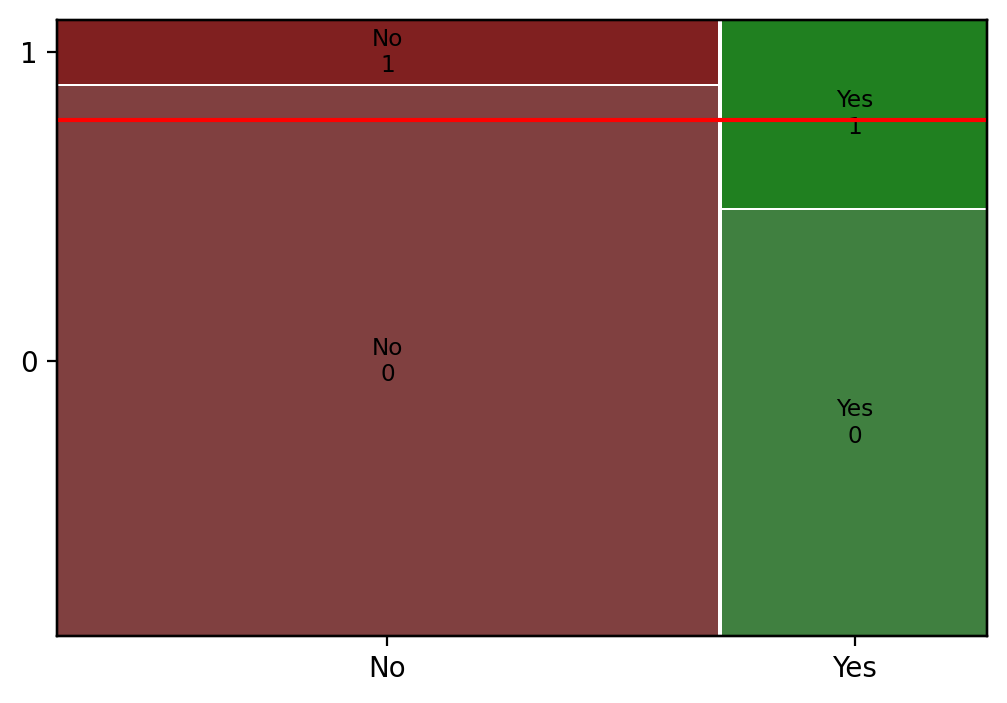

In [35]:
mosaic(data, ['OverTime', 'Attrition'])
plt.axhline(1-data['Attrition'].mean(), color='r')
plt.show()


- **질문:** 두 차트로 볼 때, 야근 여부(OverTime)에 따라 이직 여부(Attrition)가 달라지나요?

In [ ]:
#

## **4. 수치화**

- 카이제곱검정을 사용해 수치화해 비교해 보세요.

**1️⃣ 성별(Gender) → 이직 여부(Attrition)**

In [22]:
table = pd.crosstab(data['Gender'], data['Attrition'])

result = spst.chi2_contingency(table)
print('* 카이제곱통계량:', result[0])
print('* p-value:', result[1])
print('* 기대빈도:\n',result[3])

* 카이제곱통계량: 2.5537631338119975
* p-value: 0.1100318964829815
* 기대빈도:
 [[392.5326087  76.4673913]
 [608.4673913 118.5326087]]


**2️⃣ 직무만족도(JobSatisfaction) → 이직 여부(Attrition)**

In [24]:
table = pd.crosstab(data['JobSatisfaction'], data['Attrition'])

result = spst.chi2_contingency(table)
print('* 카이제곱통계량:', result[0])
print('* p-value:', result[1])
print('* 기대빈도:\n',result[3])

* 카이제곱통계량: 8.40684948576828
* p-value: 0.0383107376547955
* 기대빈도:
 [[203.38043478  39.61956522]
 [189.15217391  36.84782609]
 [296.2826087   57.7173913 ]
 [312.18478261  60.81521739]]


**3️⃣ 결혼 상태(MaritalStatus) → 이직 여부(Attrition)**

In [25]:
table = pd.crosstab(data['MaritalStatus'], data['Attrition'])

result = spst.chi2_contingency(table)
print('* 카이제곱통계량:', result[0])
print('* p-value:', result[1])
print('* 기대빈도:\n',result[3])

* 카이제곱통계량: 47.82247929575401
* p-value: 4.12553775054082e-11
* 기대빈도:
 [[220.95652174  43.04347826]
 [458.65217391  89.34782609]
 [321.39130435  62.60869565]]


**4️⃣ 야근 여부(OverTime) → 이직 여부(Attrition)**

In [26]:
table = pd.crosstab(data['OverTime'], data['Attrition'])

result = spst.chi2_contingency(table)
print('* 카이제곱통계량:', result[0])
print('* p-value:', result[1])
print('* 기대빈도:\n',result[3])


* 카이제곱통계량: 71.28471646317081
* p-value: 3.092218315896121e-17
* 기대빈도:
 [[714.76086957 139.23913043]
 [286.23913043  55.76086957]]
